In [7]:
from pathlib import Path
import matplotlib as mpl

import matplotlib.pyplot as plt
import colorcet  # noqa: F401
from flow_analysis_comps.video_manipulation.control_class import videoControl
from flow_analysis_comps.Classic.extract_velocity import kymoAnalyser, videoDeltas

plt.close("all")

%matplotlib widget

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
video_root_folder = Path(r'/Users/simonvanstaalduine/AMOLF-SHIMIZU Dropbox/Simon van Staalduine/034')
info_file_address = Path(video_root_folder / 'videoInfo.txt')
video_operator = videoControl(video_root_folder, info_file_address)
mean_img = video_operator.mean_img
print(mean_img.shape)

(1500, 2048)


In [9]:
kymographs = video_operator.get_kymographs()

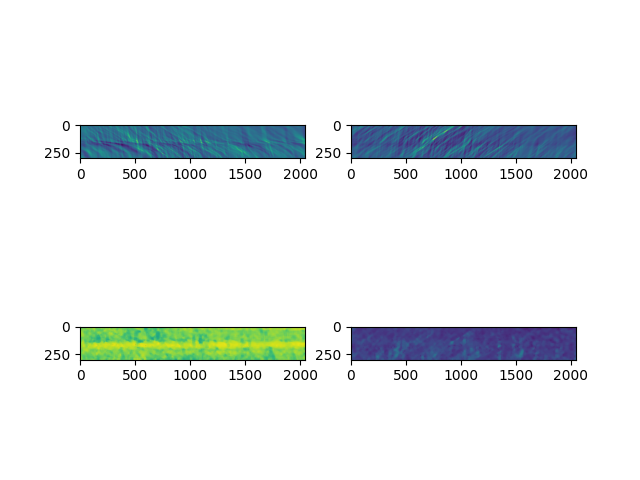

In [ ]:
video_deltas = videoDeltas(
    delta_x=video_operator.space_pixel_size,
    delta_t=video_operator.time_pixel_size
)


for key, kymo in kymographs.items():
    fig, ax = plt.subplots(2, 2)
    # ax.imshow(kymo)

    analyser = kymoAnalyser(kymo, video_deltas=video_deltas)
    decomposition = analyser.kymograph_decomposed_directions

    ax[0][0].imshow(analyser.kymograph_decomposed_directions[0])
    ax[0][1].imshow(analyser.kymograph_decomposed_directions[1])
    result = analyser.speed_images
    ax[1][0].imshow(result[0])
    ax[1][1].imshow(result[1])
    